In [151]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


In [31]:
data_path = 'Insurance claims data.csv'

In [32]:
data = pd.read_csv(data_path)

In [33]:
data.head()

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


In [34]:
data.columns

Index(['policy_id', 'subscription_length', 'vehicle_age', 'customer_age',
       'region_code', 'region_density', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'steering_type', 'turning_radius', 'length',
       'width', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'claim_status'],
      dtype='object')

In [35]:
data.shape

(58592, 41)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

In [99]:
numerical_columns = []
object_columns = []

for col in data.columns:
    if data[col].dtype == 'object':
        object_columns.append(col)
    else:
        numerical_columns.append(col)
print("Numerical Columns:", numerical_columns)
print("Object Columns:", object_columns)

Numerical Columns: ['subscription_length', 'vehicle_age', 'customer_age', 'region_density', 'airbags', 'displacement', 'cylinder', 'turning_radius', 'length', 'width', 'gross_weight', 'ncap_rating', 'claim_status']
Object Columns: ['policy_id', 'region_code', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'transmission_type', 'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert']


In [108]:
numerical_columns = data[numerical_columns]

In [102]:
object_columns = data[object_columns].drop('policy_id',axis=1)

In [103]:
label_encoder = LabelEncoder()
for col in object_columns.columns:
    object_columns[col] = label_encoder.fit_transform(object_columns[col])

In [104]:
object_columns .head()

,region_code,segment,model,fuel_type,max_torque,max_power,engine_type,is_esc,is_adjustable_steering,is_tpms,...,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
0,20,4,5,1,4,0,3,1,1,1,...,1,1,1,1,1,1,1,0,1,1
1,11,3,10,1,2,8,10,0,1,0,...,0,1,0,1,1,1,1,1,1,1
2,20,4,5,1,4,0,3,1,1,1,...,1,1,1,1,1,1,1,0,1,1
3,1,0,0,0,5,2,6,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,4,2,6,1,3,7,4,0,1,0,...,0,0,0,1,1,1,0,0,1,1


In [111]:
X = pd.concat([numerical_columns,object_columns],axis=1)

In [112]:
X.drop(['claim_status'],axis=1,inplace = True)

In [113]:
y = data['claim_status']

In [114]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [126]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=42)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [128]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}


In [129]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [130]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  SVC
Accuracy -  0.9342094035327246
Precision -  0.0
For  KN
Accuracy -  0.9311374690673265
Precision -  0.09090909090909091
For  NB
Accuracy -  0.40506869186790684
Precision -  0.06593868122637547
For  DT
Accuracy -  0.9341240720197969
Precision -  0.0


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  LR
Accuracy -  0.9342094035327246
Precision -  0.0
For  RF
Accuracy -  0.9255909207270245
Precision -  0.028037383177570093


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  AdaBoost
Accuracy -  0.9342094035327246
Precision -  0.0
For  BgC
Accuracy -  0.9261882413175185
Precision -  0.0392156862745098
For  ETC
Accuracy -  0.9205563614642888
Precision -  0.045454545454545456
For  GBDT
Accuracy -  0.9342094035327246
Precision -  0.0
For  xgb
Accuracy -  0.9342094035327246
Precision -  0.0


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [131]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [132]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.931137,0.090909
2,NB,0.405069,0.065939
8,ETC,0.920556,0.045455
7,BgC,0.926188,0.039216
5,RF,0.925591,0.028037
0,SVC,0.934209,0.000000
3,DT,0.934124,0.000000
4,LR,0.934209,0.000000
6,AdaBoost,0.934209,0.000000
9,GBDT,0.934209,0.000000


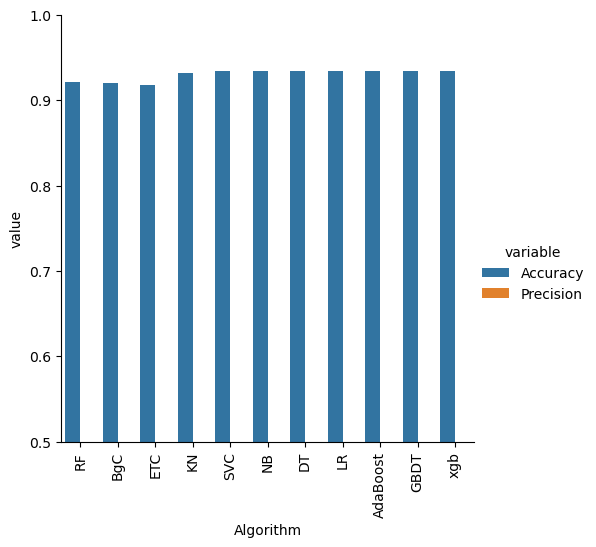

In [133]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [134]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('xgb', xgb), ('RF', rfc), ('BgC', bc)],voting='soft')

In [135]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_ra...
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=2, ...)),
                             ('RF',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=42)),
                             ('BgC',
                              BaggingClassifier(n_estimators=50,
                                                random_state=2))],
                 voting='soft')

In [136]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9323321102483147
Precision 0.07692307692307693


In [164]:
feature_importance = rfc.feature_importances_

In [165]:
# Create a DataFrame to store feature names and their corresponding importances
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the DataFrame by feature importance in descending order
features_df = features_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
features_df.head(10)

,Feature,Importance
0,subscription_length,0.408282
2,customer_age,0.261962
1,vehicle_age,0.196098
3,region_density,0.061543
12,region_code,0.061235
14,model,0.000957
9,width,0.000783
8,length,0.000780
10,gross_weight,0.000722
18,engine_type,0.000664


In [166]:
# Separating features (X) and target variable (y) from the oversampled dataset
X_oversampled = oversampled_data.drop('claim_status', axis=1)
y_oversampled = oversampled_data['claim_status']

In [167]:
# Apply LabelEncoder to each column if the column dtype is 'object', else keep the column as is
X_oversampled_encoded = X_oversampled.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)

In [168]:
# Splitting the oversampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_oversampled_encoded, y_oversampled, test_size=0.4, random_state=42)

In [169]:
# Instantiate the Random Forest classifier with a random state of 42
rf_model_oversampled = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf_model_oversampled.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [170]:
# Predicting the target variable for the test set using the trained model
y_pred = rf_model_oversampled.predict(X_test)

In [171]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     21994
           1       0.98      1.00      0.99     21882

    accuracy                           0.99     43876
   macro avg       0.99      0.99      0.99     43876
weighted avg       0.99      0.99      0.99     43876

